# 0 - Load modules

In [2]:
import sys
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import glob
from netCDF4 import Dataset
import cartopy.crs as ccrs
import json
import os
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



In [12]:
config='GS36'
case='MPC001'
namezone='NATL60-CJM165_GS_y2012-2013'
jsonfile='/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/NATL60-CJM165_GS_y2012-2013_1.json'
dirn='/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/'+config+'-'+case+'/'

In [17]:
!python 2020-01-29-AA-proj-vert-standart-levels.py --jsonfile '/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/NATL60-CJM165_GS_y2012-2013_1.json' --dir '/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/GS36-MPC001/' --conf 'GS36' --case 'MPC001' --nz 'NATL60-CJM165_GS_y2012-2013'

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
2020-01-29-AA-proj-vert-standart-levels.py:218: DeprecationWarning: 'U' mode is deprecated
  sourcefile=open(jsonfile,'rU')
dealing with profile A20121001-03173
/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/GS36-MPC001//profiles_EN4-A20121001-03173_GS36-MPC001_TS.nc exists
/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/GS36-MPC001//profiles_EN4-A20121001-03173_GS36-MPC001_TS_vert-stand.nc does not exist; lets project
profile b' A20121001-03173' has been projected, output file is/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/GS36-MPC001//profiles_EN4-A20121001-03173_GS36-MPC001_TS_vert-stand.nc
dealing

/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/GS36-MPC001//profiles_EN4-A20121001-40076_GS36-MPC001_TS.nc does not exist
dealing with profile A20121001-40095
/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/GS36-MPC001//profiles_EN4-A20121001-40095_GS36-MPC001_TS.nc does not exist
dealing with profile A20121001-40096
/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/GS36-MPC001//profiles_EN4-A20121001-40096_GS36-MPC001_TS.nc does not exist
dealing with profile A20121001-40097
/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/GS36-MPC001//profiles_EN4-A20121001-40097_GS36-MPC001_TS.nc does not exist
dealing with profile A20121001-40098
/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/GS36-MPC001//profiles_EN4-A20121001-40098_GS36-MPC001_TS.nc does not exist
dealing with profile A20121001-40099
/scratch/cnt0024/hmg2840/albert7a/E

dealing with profile A20121001-03173
/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/GS36-MPC001//profiles_EN4-A20121001-03173_GS36-MPC001_TS_vert-stand.nc exists
dealing with profile A20121001-03175
/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/GS36-MPC001//profiles_EN4-A20121001-03175_GS36-MPC001_TS_vert-stand.nc exists
dealing with profile A20121001-03182
/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/GS36-MPC001//profiles_EN4-A20121001-03182_GS36-MPC001_TS_vert-stand.nc exists
dealing with profile A20121001-03196
/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/GS36-MPC001//profiles_EN4-A20121001-03196_GS36-MPC001_TS_vert-stand.nc exists
dealing with profile A20121001-03200
/scratch/cnt0024/hmg2840/albert7a/EN4/profiles_files/NATL60-CJM165_GS_y2012-2013/GS36-MPC001//profiles_EN4-A20121001-03200_GS36-MPC001_TS_vert-stand.nc exists
dealing with profile

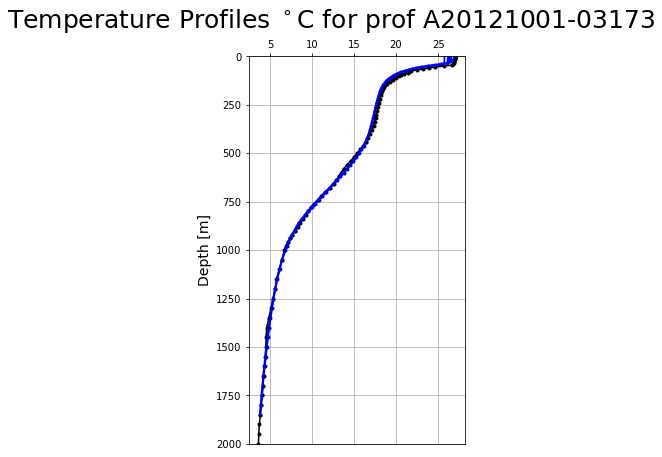

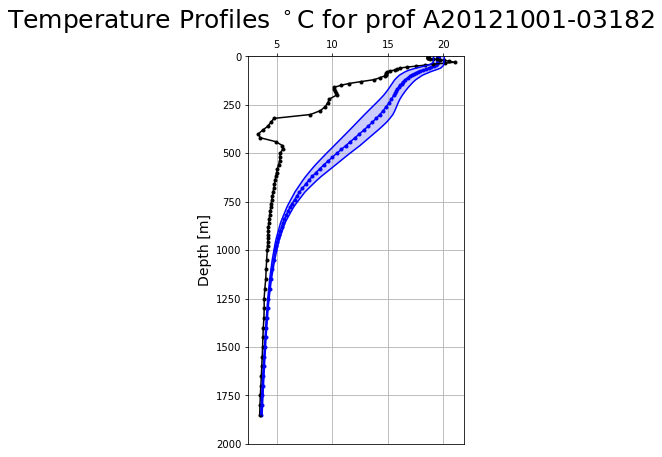

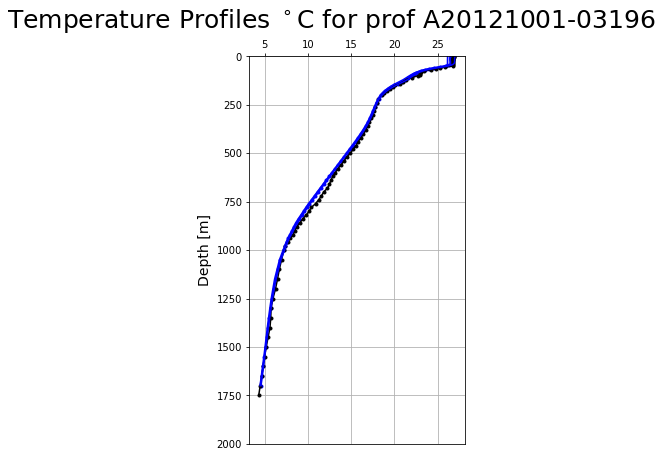

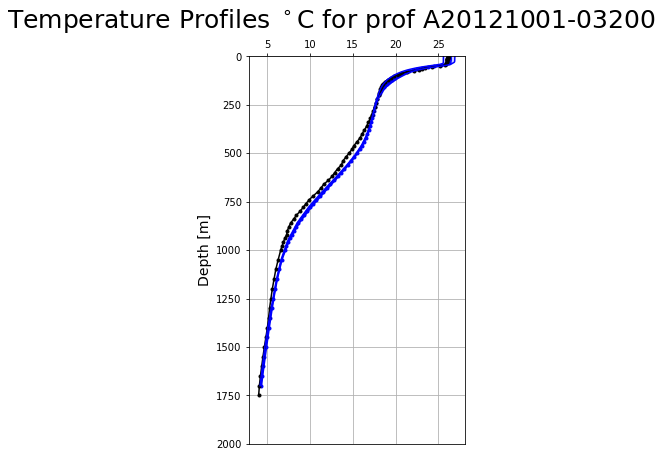

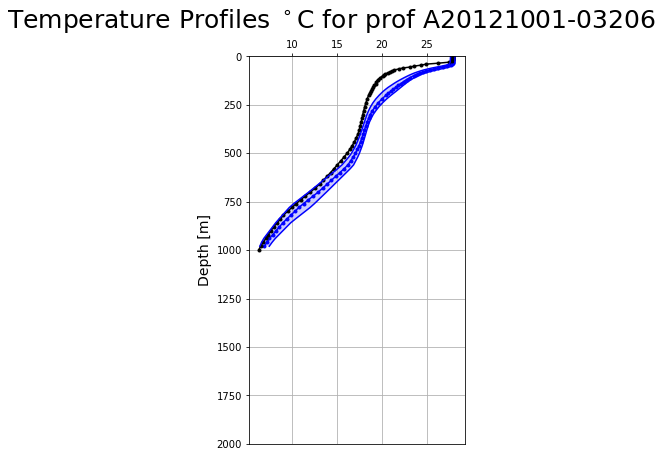

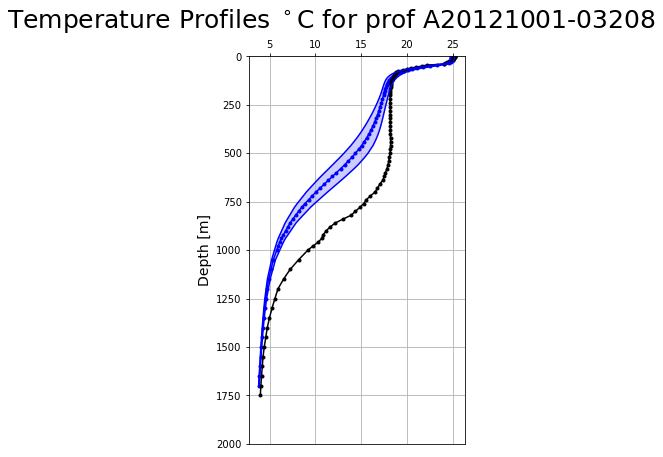

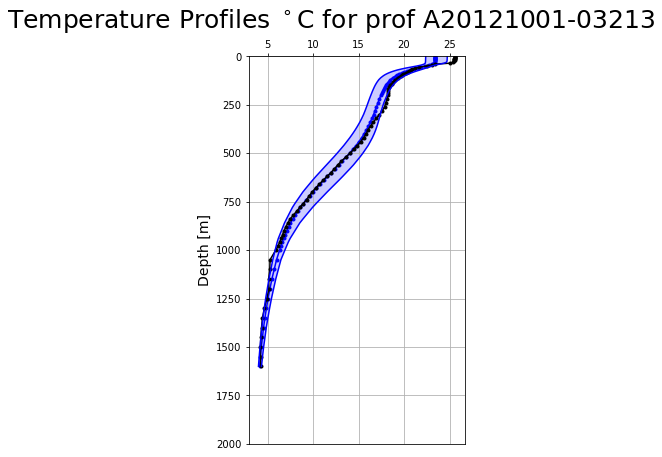

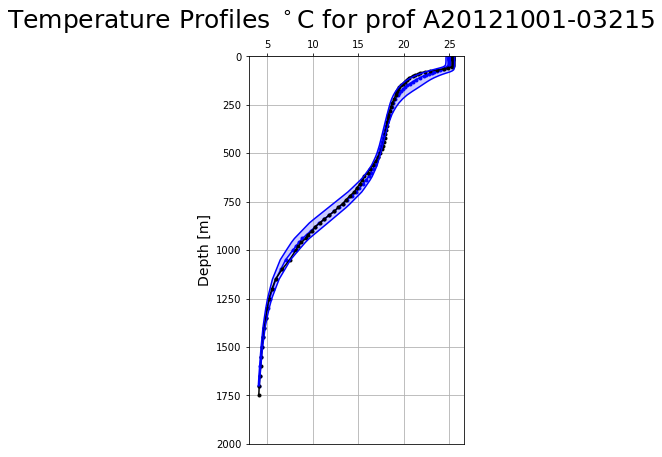

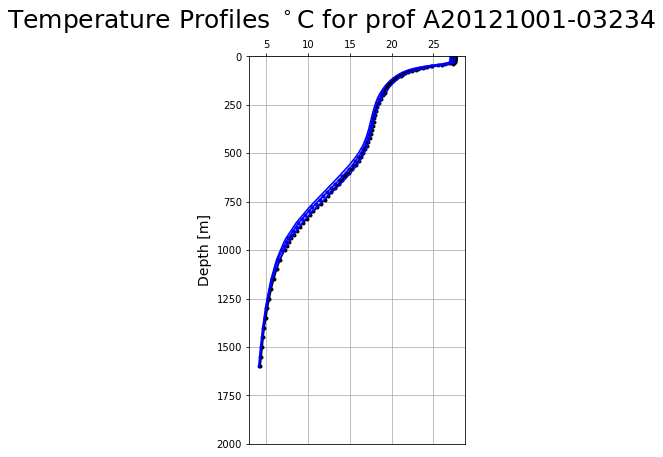

In [20]:
#averaging the data in boxes

vert_standart=[0,2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140,150,160,170,180,190,200,220,240,260,280,300,320,340,360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,800,820,840,860,880,900,920,940,960,980,1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000]

def get_netcdf_profiles(netcdf_name):
    
    dsprof=xr.open_dataset(netcdf_name)
    depth=dsprof['depth_en4']
    temp_en4=dsprof['temp_profileEN4']
    salt_en4=dsprof['salt_profileEN4']
    mean_temp_model=dsprof['mean_temp_model']
    mean_salt_model=dsprof['mean_salt_model']
    percent10_temp_model=dsprof['percent10_temp_model']
    percent10_salt_model=dsprof['percent10_salt_model']
    percent90_temp_model=dsprof['percent90_temp_model']
    percent90_salt_model=dsprof['percent90_salt_model']

    return depth,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model


sourcefile=open(jsonfile,'rU')
infos=json.load(sourcefile)
nb_profilesEN4=len(infos)

for prof in np.arange(nb_profilesEN4):
    list_profiles = infos.keys()
    reference = str(list(list_profiles)[prof])
    reference_profile=reference[-16:-1]
    print("dealing with profile "+reference_profile)
    outname=dirn+"/profiles_EN4-"+reference_profile+"_"+config+"-"+case+"_TS_vert-stand.nc"

    if os.path.exists(outname):
        print(outname+" exists")
        depth,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model = get_netcdf_profiles(outname)
        ien4=np.where(np.isnan(temp_en4)==True)
        if len(ien4[:][0]) >0:
            d=depth[np.min(ien4[:][0])].values
        else:
            d=2000
        if d>1000:
            fig, ax = plt.subplots(1,1, figsize=(4, 6))
            title = 'Temperature Profiles $^\circ$C for prof '+reference_profile
            plt.suptitle(title,size = 25,y=1.05)
            ax.plot(mean_temp_model,vert_standart,'b.-', label='temp model')
            ax.plot(temp_en4,vert_standart,'k.-', label='temp en4')
            ax.set_ylabel('Depth [m]', size=14)
            ax.set_ylim(2000, 0)
            ax.grid(True, which='both')
            ax.xaxis.tick_top()
            ax.xaxis.set_label_position('top') 
            ax.plot(percent10_temp_model,vert_standart,'b-', label='percent10')
            ax.plot(percent90_temp_model,vert_standart,'b-', label='percent90')
            ax.fill_betweenx(vert_standart, percent10_temp_model, x2=percent90_temp_model, alpha=0.2, facecolor='b')
            fig.tight_layout()
